# Libraries #

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Read Data #

In [3]:
img_matrix=np.zeros((400,10304))
count = 0
l = []
for i in range(1,41):
    for j in range(1,11):
        img = cv.imread(f'data\\s{i}\\{j}.pgm',-1)
        img = img.reshape(1,10304)
        for k in range(10304):
            img_matrix[count,k] =img[0][k] 
        count+=1

In [4]:
img_matrix

array([[ 48.,  49.,  45., ...,  47.,  46.,  46.],
       [ 60.,  60.,  62., ...,  32.,  34.,  34.],
       [ 39.,  44.,  53., ...,  29.,  26.,  29.],
       ...,
       [125., 119., 124., ...,  36.,  39.,  40.],
       [119., 120., 120., ...,  89.,  94.,  85.],
       [125., 124., 124., ...,  36.,  35.,  34.]])

# Split Data and create splitted labels #

In [5]:
count = 0
l=[]
for i in range(1,41):
    for j in range(1,6):
        l.append('s'+str(i))
# label_matrix = np.array(l).reshape(400,1)
train_label = np.array(l).reshape(200,1)
test_label = np.array(l).reshape(200,1)

In [6]:
test_img = np.empty((200,10304))
train_img = np.empty((200,10304))
#test[even split]
count = 0
for i in range(0,400,2):
    for k in range(10304):
        test_img[count,k] = img_matrix[i,k]
    count+=1
#train[odd split]
count = 0
for i in range(1,400,2):
    for k in range(10304):
        train_img[count,k] = img_matrix[i,k]
    count+=1

In [7]:
train_img.shape

(200, 10304)

### eigenvalues are sorted in descending order to provide a ranking of the components or axes of the new subspace for matrix A. If there are eigenvalues close to zero, they represent components that may be discarded ###

In [8]:
alpha = [0.8 , 0.85 , 0.9 , 0.95]

In [9]:
def comp_Dims(eigVal,threshold):
    totalDataVariance=np.sum(eigVal)
    varianceFraction,numDim,eigValSum=0,1,0
    while(varianceFraction<threshold):
        eigValSum+=eigVal[numDim-1]
        varianceFraction=eigValSum/totalDataVariance
        numDim+=1
    return numDim

In [10]:
def PCA(D,alpha):
    dim_array= np.empty((1,len(alpha)))
    proj_mat = []
    #calculate mean compute mean of each col
    mu_mat = np.mean(D,axis=0)
    #center data
    Z = D-mu_mat
    #calculate cov_matrix    
    #rowvar=False cols represente variables (defalut rows rep variables
    #bias=True    Normalize by N
    cov = np.cov(Z,rowvar=False,bias=True)
    #calc evalu & evec
    evalu,evec = LA.eig(cov)
    #sort evalu,evec 
    indx = evalu.argsort()[::-1]#return indeces of evalu sorted in descending order
    evalu = evalu[indx]
    evec = evec[:,indx]
    
    #calculating dims needed for alpha
    
    for i in range(len(alpha)):
        dim_array[0,i] = int(comp_Dims(evalu,alpha[i]))
    #calc projection matrecies
    for i in range(len(dim_array[0])):
        proj_mat.append(evec[:,0:int(dim_array[0,i])]) 
    return proj_mat

In [11]:
proj_mat = PCA(train_img,alpha)

# projecting data on the new projection matrix #

In [12]:
Z_train = train_img - np.mean(train_img,axis=0)
Z_test = test_img - np.mean(test_img,axis=0)

rd1_train= (proj_mat[0].T @ Z_train.T)
rd2_train= (proj_mat[1].T @ Z_train.T)
rd3_train= (proj_mat[2].T @ Z_train.T)
rd4_train= (proj_mat[3].T @ Z_train.T)
print(rd1_train.shape,rd2_train.shape,rd3_train.shape,rd4_train.shape)
rd1_test=(proj_mat[0].T @ Z_test.T)
rd2_test=(proj_mat[1].T @ Z_test.T)
rd3_test=(proj_mat[2].T @ Z_test.T)
rd4_test=(proj_mat[3].T @ Z_test.T)
print(rd1_test.shape,rd2_test.shape,rd3_test.shape,rd4_test.shape)

(38, 200) (54, 200) (78, 200) (117, 200)
(38, 200) (54, 200) (78, 200) (117, 200)


In [13]:
def acc(pred,act):#dim (200,1)
    count = 0
    m,n = pred.shape
    for i in range(m):
        if pred[i,0] == act[i,0]:
            count+=1
    return (count/m)*100

In [14]:
acc_list = []
#alpha = 0.8
knn = KNN()
knn.fit(rd1_train.real.T,train_label)
pred = knn.predict(rd1_test.real.T)
pred=pred.reshape(200,1)
acc_list.append(acc(pred,test_label))
print(f'Accuracy of α={0.8} ===> {acc(pred,test_label)}%')

Accuracy of α=0.8 ===> 83.5%


In [15]:
#alpha = 0.85
knn.fit(rd2_train.real.T,train_label)
pred = knn.predict(rd2_test.real.T)
pred=pred.reshape(200,1)
acc_list.append(acc(pred,test_label))
print(f'Accuracy of α={0.85} ===> {acc(pred,test_label)}%')

Accuracy of α=0.85 ===> 84.5%


In [16]:
#alpha = 0.9
knn.fit(rd3_train.real.T,train_label)
pred = knn.predict(rd3_test.real.T)
pred=pred.reshape(200,1)
acc_list.append(acc(pred,test_label))
print(f'Accuracy of α={0.9} ===> {acc(pred,test_label)}%')

Accuracy of α=0.9 ===> 83.5%


In [17]:
#alpha = 0.95
knn.fit(rd4_train.real.T,train_label)
pred = knn.predict(rd4_test.real.T)
pred=pred.reshape(200,1)
acc_list.append(acc(pred,test_label))
print(f'Accuracy of α={0.95} ===> {acc(pred,test_label)}%')

Accuracy of α=0.95 ===> 83.5%


<function matplotlib.pyplot.show(close=None, block=None)>

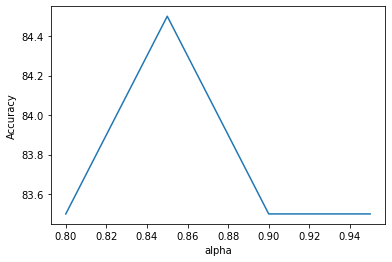

In [18]:
plt.plot(alpha,acc_list)
plt.ylabel('Accuracy')
plt.xlabel('alpha')
plt.show

### The accuracy increases with alpha until reaching a certain threshold then it starts to decrease again ### 

# KNN #

In [19]:
#n = 1
acc_list1 = []
knn = KNN(n_neighbors=1)
knn.fit(train_img,train_label)
pred = knn.predict(test_img)
pred=pred.reshape(200,1)
acc_list1.append(acc(pred,test_label))
print(f'Accuracy of neighbors:{1} ===> {acc(pred,test_label)}%')

Accuracy of neighbors:1 ===> 94.5%


In [20]:
# n = 3
knn = KNN(n_neighbors=3)
knn.fit(train_img,train_label)
pred = knn.predict(test_img)
pred=pred.reshape(200,1)
acc_list1.append(acc(pred,test_label))
print(f'Accuracy of neighbors:{3} ===> {acc(pred,test_label)}%')

Accuracy of neighbors:3 ===> 88.0%


In [21]:
# n = 5
knn = KNN(n_neighbors=5)
knn.fit(train_img,train_label)
pred = knn.predict(test_img)
pred=pred.reshape(200,1)
acc_list1.append(acc(pred,test_label))
print(f'Accuracy of neighbors:{1} ===> {acc(pred,test_label)}%')

Accuracy of neighbors:1 ===> 83.5%


In [22]:
# n = 7
knn = KNN(n_neighbors=7)
knn.fit(train_img,train_label)
pred = knn.predict(test_img)
pred=pred.reshape(200,1)
acc_list1.append(acc(pred,test_label))
print(f'Accuracy of neighbors:{1} ===> {acc(pred,test_label)}%')

Accuracy of neighbors:1 ===> 77.5%


<function matplotlib.pyplot.show(close=None, block=None)>

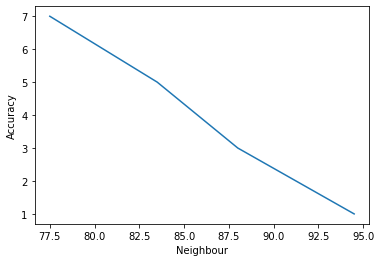

In [23]:
plt.plot(acc_list1,[1,3,5,7])
plt.ylabel('Accuracy')
plt.xlabel('Neighbour')
plt.show

# Bonus

In [24]:
l=[]
for i in range(1,41):
    for j in range(1,11):
        l.append('S'+str(i))
nlabel= np.array(l).reshape(400,1)
nlabel

array([['S1'],
       ['S1'],
       ['S1'],
       ['S1'],
       ['S1'],
       ['S1'],
       ['S1'],
       ['S1'],
       ['S1'],
       ['S1'],
       ['S2'],
       ['S2'],
       ['S2'],
       ['S2'],
       ['S2'],
       ['S2'],
       ['S2'],
       ['S2'],
       ['S2'],
       ['S2'],
       ['S3'],
       ['S3'],
       ['S3'],
       ['S3'],
       ['S3'],
       ['S3'],
       ['S3'],
       ['S3'],
       ['S3'],
       ['S3'],
       ['S4'],
       ['S4'],
       ['S4'],
       ['S4'],
       ['S4'],
       ['S4'],
       ['S4'],
       ['S4'],
       ['S4'],
       ['S4'],
       ['S5'],
       ['S5'],
       ['S5'],
       ['S5'],
       ['S5'],
       ['S5'],
       ['S5'],
       ['S5'],
       ['S5'],
       ['S5'],
       ['S6'],
       ['S6'],
       ['S6'],
       ['S6'],
       ['S6'],
       ['S6'],
       ['S6'],
       ['S6'],
       ['S6'],
       ['S6'],
       ['S7'],
       ['S7'],
       ['S7'],
       ['S7'],
       ['S7'],
       ['S7'],
       ['S

In [25]:
nx_train,nx_test,ny_train,ny_test = train_test_split(img_matrix,nlabel, test_size=0.3, random_state=42)

In [26]:
nx_train.shape,nx_test.shape,ny_train.shape,ny_test.shape

((280, 10304), (120, 10304), (280, 1), (120, 1))

In [27]:
n_proj = PCA(nx_train,alpha)

In [28]:
Z_train = nx_train - np.mean(nx_train,axis=0)
Z_test = nx_test - np.mean(nx_test,axis=0)

rd1_train= (n_proj[0].T @ Z_train.T)
rd2_train= (n_proj[1].T @ Z_train.T)
rd3_train= (n_proj[2].T @ Z_train.T)
rd4_train= (n_proj[3].T @ Z_train.T)
print(rd1_train.shape,rd2_train.shape,rd3_train.shape,rd4_train.shape)
rd1_test=(n_proj[0].T @ Z_test.T)
rd2_test=(n_proj[1].T @ Z_test.T)
rd3_test=(n_proj[2].T @ Z_test.T)
rd4_test=(n_proj[3].T @ Z_test.T)
print(rd1_test.shape,rd2_test.shape,rd3_test.shape,rd4_test.shape)

(43, 280) (63, 280) (96, 280) (152, 280)
(43, 120) (63, 120) (96, 120) (152, 120)


In [30]:
#alpha = 0.8
acc_list1 = []
svc = SVC()
svc.fit(rd1_train.real.T,ny_train)
pred = svc.predict(rd1_test.real.T)
pred=pred.reshape(120,1)
acc_list1.append(acc(pred,ny_test))
print(f'Accuracy of α={0.8} ===> {acc(pred,ny_test)}%')

Accuracy of α=0.8 ===> 94.16666666666667%


In [31]:
#alpha = 0.85
svc = SVC()
svc.fit(rd2_train.real.T,ny_train)
pred = svc.predict(rd2_test.real.T)
pred=pred.reshape(120,1)
acc_list1.append(acc(pred,ny_test))
print(f'Accuracy of α={0.85} ===> {acc(pred,ny_test)}%')

Accuracy of α=0.85 ===> 94.16666666666667%


In [32]:
svc = SVC()
svc.fit(rd3_train.real.T,ny_train)
pred = svc.predict(rd3_test.real.T)
pred = pred.reshape(120,1)
acc_list1.append(acc(pred,ny_test))
print(f'Accuracy of α={0.9} ===> {acc(pred,ny_test)}%')

Accuracy of α=0.9 ===> 94.16666666666667%


In [33]:
svc = SVC()
svc.fit(rd4_train.real.T,ny_train)
pred = svc.predict(rd4_test.real.T)
pred = pred.reshape(120,1)
acc_list1.append(acc(pred,ny_test))
print(f'Accuracy of α={0.95} ===> {acc(pred,ny_test)}%')

Accuracy of α=0.95 ===> 93.33333333333333%


<function matplotlib.pyplot.show(close=None, block=None)>

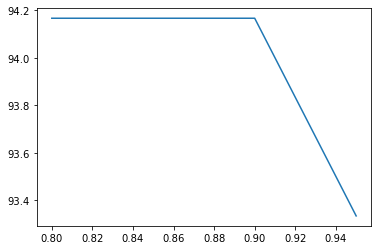

In [35]:
plt.plot(alpha,acc_list1)
plt.show

## The results of the SVC model are significantly better than KNN model